# Introduction

The main aim is to build a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan. This a supervised classification problem. Classification is the process of predicting a new target variable's class on the basis of a training set of data containing observations (or instances) whose category membership is already known.It is considered as a form of supervised learning, i.e., learning where a training set of correctly identified observations is available. This classification in unsupervised procedure is known as clustering, and involves grouping data into categories based on some measure of inherent similarity or distance. classifictaion problems are divided into two main categories:

- Binary Classication Problem: These problems have only 2 classifiers that can be 0/1 (Yes/No) or can be any other 2 categories.
- Multiple classification problems: These problems can have multiple classifiers.

In this notebook we deal with binary classification problem where the target variable is to predict whether the loan is repaid or not. 


# Data 

## Description and Overview:

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population.

There are 7 different sources of data:

* application_train/application_test: The main training data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. Here we will use only the Training data.

* bureau: In this dataset it consists of data concerning client’s previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

* bureau_balance: It consists of monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.

* previous_application:The data of previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.

* POS_CASH_BALANCE: It consists of monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

* credit_card_balance:The monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.

* installments_payment:The data of payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

The below diagram shows the relation:

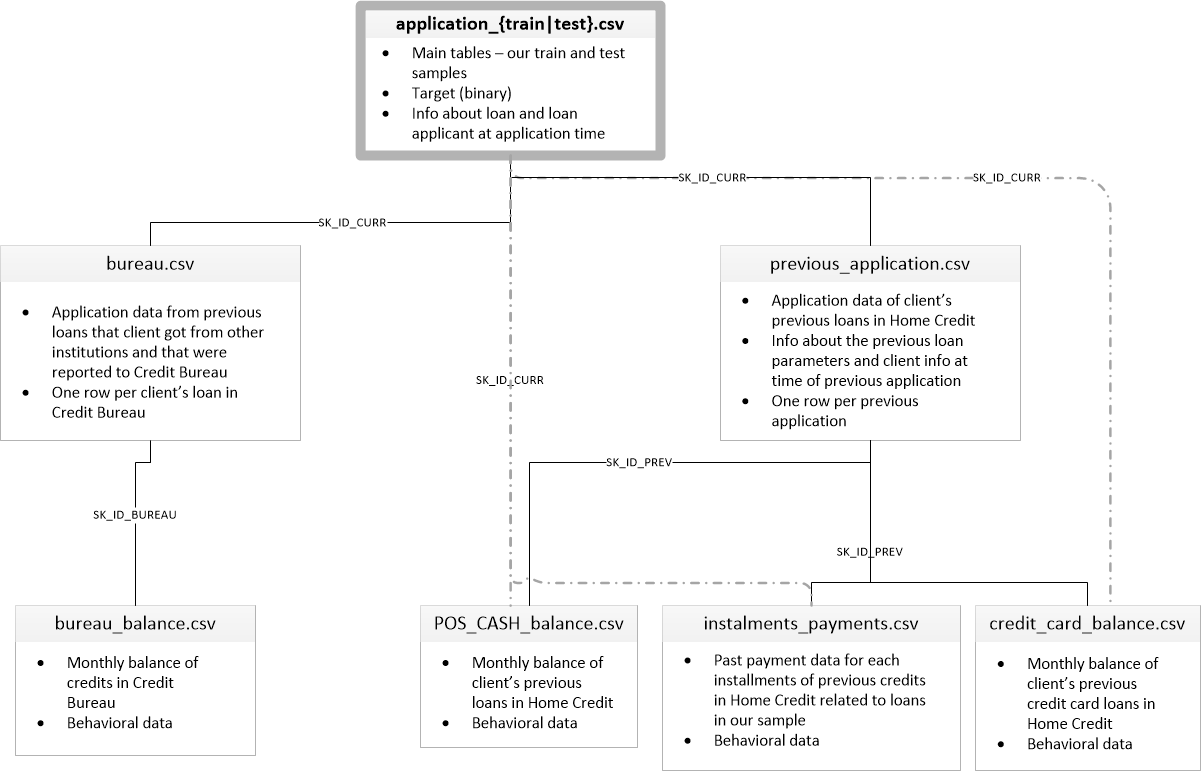

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/images/home_credit.png


### Imports

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


#plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()


warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Data

In [3]:
# Training data

application_train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
print('Training data shape: ', application_train.shape)
application_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

In [4]:
# Testing data features
app_test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [5]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

### Examine the missing values

In [6]:
# Helper Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

We will handle these missing values in our notebook later using imputations

No of unique entries in each categorical column 

### Column Datatypes

In [8]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

# Data Visualizations

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

### Target Variable Distribution

In [9]:
x=application_train['TARGET'].value_counts()
labels = [' not re-paid','re-paid']
fig = go.Figure(data=[go.Pie(labels=labels, values=x, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()


On seeing the above graph we can say that the data is highly imbalanced. The loan which are repaid are very less compared ones that are not repayed. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

### Types of Loan 

In [10]:

t1 = application_train.loc[application_train['TARGET'] != 0]
t0 = application_train.loc[application_train['TARGET'] == 0]

labels = ['Cash Loans', 'Revolving Loans']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],
                    subplot_titles=['Overall distribution', 'Target specific (t=1)','Target specific (t=0)' ])
fig.add_trace(go.Pie(labels=labels, values= application_train['NAME_CONTRACT_TYPE'].value_counts(), 
                     name="Overall"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values= t1['NAME_CONTRACT_TYPE'].value_counts(),
                     name="Not returned loan(t=1)"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values= t0['NAME_CONTRACT_TYPE'].value_counts(), 
                     name="Returned Loan(t=0)"), 1, 3)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Types of Loans",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Overall', x=0.14, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 1', x=0.50, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 0', x=0.85, y=0.46, font_size=20, showarrow=False)])

fig.layout.template = 'plotly_white'

fig.show()

NameError: name 'make_subplots' is not defined

### Gender of the applicants

In [11]:
t1 = application_train.loc[application_train['TARGET'] != 0]
t0 = application_train.loc[application_train['TARGET'] == 0]

labels = ['Male', 'Female']

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],
                    subplot_titles=['Overall distribution', 'Target specific (t=1)','Target specific (t=0)' ])
fig.add_trace(go.Pie(labels=labels, values= application_train['CODE_GENDER'].value_counts(), 
                     name="Overall"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values= t1['CODE_GENDER'].value_counts(),
                     name="Not returned loan(t=1)"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values= t0['CODE_GENDER'].value_counts(), 
                     name="Returned Loan(t=0)"), 1, 3)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Types of Loans",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Overall', x=0.14, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 1', x=0.50, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 0', x=0.85, y=0.46, font_size=20, showarrow=False)])

fig.layout.template = 'plotly_white'

fig.show()

NameError: name 'make_subplots' is not defined

### Income type of client

Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

In [12]:
income_val = application_train['NAME_INCOME_TYPE'].value_counts()
income_val_y0 = []
income_val_y1 = []
for val in income_val.index:
    income_val_y1.append(np.sum(application_train['TARGET'][application_train['NAME_INCOME_TYPE']==val] == 1))
    income_val_y0.append(np.sum(application_train['TARGET'][application_train['NAME_INCOME_TYPE']==val] == 0))
data = [go.Bar(x = income_val.index, y = ((income_val_y1 / income_val.sum()) * 100), name='Yes' ),
        go.Bar(x = income_val.index, y = ((income_val_y0 / income_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Income sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Income source',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_white'
py.iplot(fig)

### Distribution of Education 

Distribution of education of the applicant in terms of loan repaid or not. People with Academic Degree are more likely to repay the loan(Out of 164, only 3 applicants are not able to repay)

In [13]:
education_val = application_train['NAME_EDUCATION_TYPE'].value_counts()
education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(application_train['TARGET'][application_train['NAME_EDUCATION_TYPE']==val] == 1))
    education_val_y0.append(np.sum(application_train['TARGET'][application_train['NAME_EDUCATION_TYPE']==val] == 0))
data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Yes' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Education sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Education of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_white'
py.iplot(fig)

### Distribution of Housing type

In [14]:
housing_val = application_train['NAME_HOUSING_TYPE'].value_counts()
housing_val_y0 = []
housing_val_y1 = []
for val in housing_val.index:
    housing_val_y1.append(np.sum(application_train['TARGET'][application_train['NAME_HOUSING_TYPE']==val] == 1))
    housing_val_y0.append(np.sum(application_train['TARGET'][application_train['NAME_HOUSING_TYPE']==val] == 0))
data = [go.Bar(x = housing_val.index, y = ((housing_val_y1 / housing_val.sum()) * 100), name='Yes' ),
        go.Bar(x = housing_val.index, y = ((housing_val_y0 / housing_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Which type of houses applicants applied for loan in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Housing of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_white'
py.iplot(fig)

### Distribution of Family status 

In [15]:
family_val = application_train['NAME_FAMILY_STATUS'].value_counts()
family_val_y0 = []
family_val_y1 = []
for val in family_val.index:
    family_val_y1.append(np.sum(application_train['TARGET'][application_train['NAME_FAMILY_STATUS']==val] == 1))
    family_val_y0.append(np.sum(application_train['TARGET'][application_train['NAME_FAMILY_STATUS']==val] == 0))
data = [go.Bar(x = family_val.index, y = ((family_val_y1 / family_val.sum()) * 100), name='Yes' ),
        go.Bar(x = family_val.index, y = ((family_val_y0 / family_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Family Status of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Family Status of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_white'
py.iplot(fig)

### Occupation of the applicant

In [16]:
occupation_val = application_train['OCCUPATION_TYPE'].value_counts()
occupation_val_y0 = []
occupation_val_y1 = []
for val in occupation_val.index:
    occupation_val_y1.append(np.sum(application_train['TARGET'][application_train['OCCUPATION_TYPE']==val] == 1))
    occupation_val_y0.append(np.sum(application_train['TARGET'][application_train['OCCUPATION_TYPE']==val] == 0))
data = [go.Bar(x = occupation_val.index, y = ((occupation_val_y1 / occupation_val.sum()) * 100), name='Yes' ),
        go.Bar(x = occupation_val.index, y = ((occupation_val_y0 / occupation_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Types of occupation of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Occupations',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_white'
py.iplot(fig)

### Total income distribution

In [17]:
application_train[application_train['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].iplot(kind='histogram', bins=100,
   xTitle = 'Total Income', yTitle ='Count of applicants',colors='Red',
             title='Distribution of AMT_INCOME_TOTAL')

### Distribution of various other numerical columns

<Figure size 432x288 with 0 Axes>

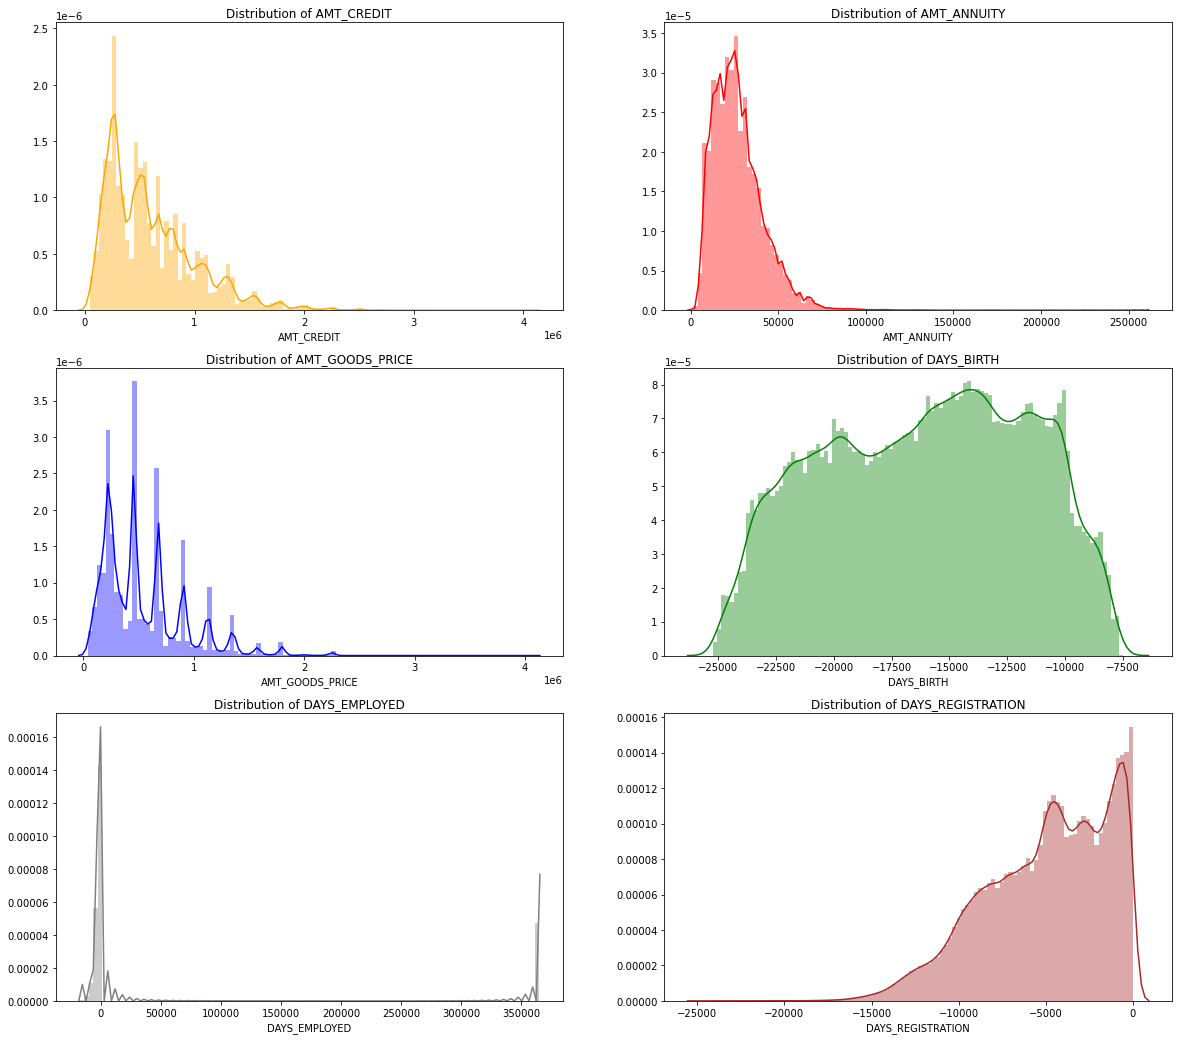

In [18]:
plt.figure()
fig, ax = plt.subplots(3,2,figsize=(20,6*3))
plt.subplot(3,2,1)
plt.title("Distribution of %s" % 'AMT_CREDIT')
sns.distplot(application_train['AMT_CREDIT'].dropna(),color='orange', kde=True,bins=100)

plt.subplot(3,2,2)
plt.title("Distribution of %s" % 'AMT_ANNUITY')
sns.distplot(application_train['AMT_ANNUITY'].dropna(),color='red', kde=True,bins=100)

plt.subplot(3,2,3)
plt.title("Distribution of %s" % 'AMT_GOODS_PRICE')
sns.distplot(application_train['AMT_GOODS_PRICE'].dropna(),color='blue', kde=True,bins=100)

plt.subplot(3,2,4)
plt.title("Distribution of %s" % 'DAYS_BIRTH')
sns.distplot(application_train['DAYS_BIRTH'].dropna(),color='green', kde=True,bins=100)

plt.subplot(3,2,5)
plt.title("Distribution of %s" % 'DAYS_EMPLOYED')
sns.distplot(application_train['DAYS_EMPLOYED'].dropna(),color='grey', kde=True,bins=100)

plt.subplot(3,2,6)
plt.title("Distribution of %s" % 'DAYS_REGISTRATION')
sns.distplot(application_train['DAYS_REGISTRATION'].dropna(),color='brown', kde=True,bins=100)
plt.show()

### Comparison of the intreval values with the target

<Figure size 432x288 with 0 Axes>

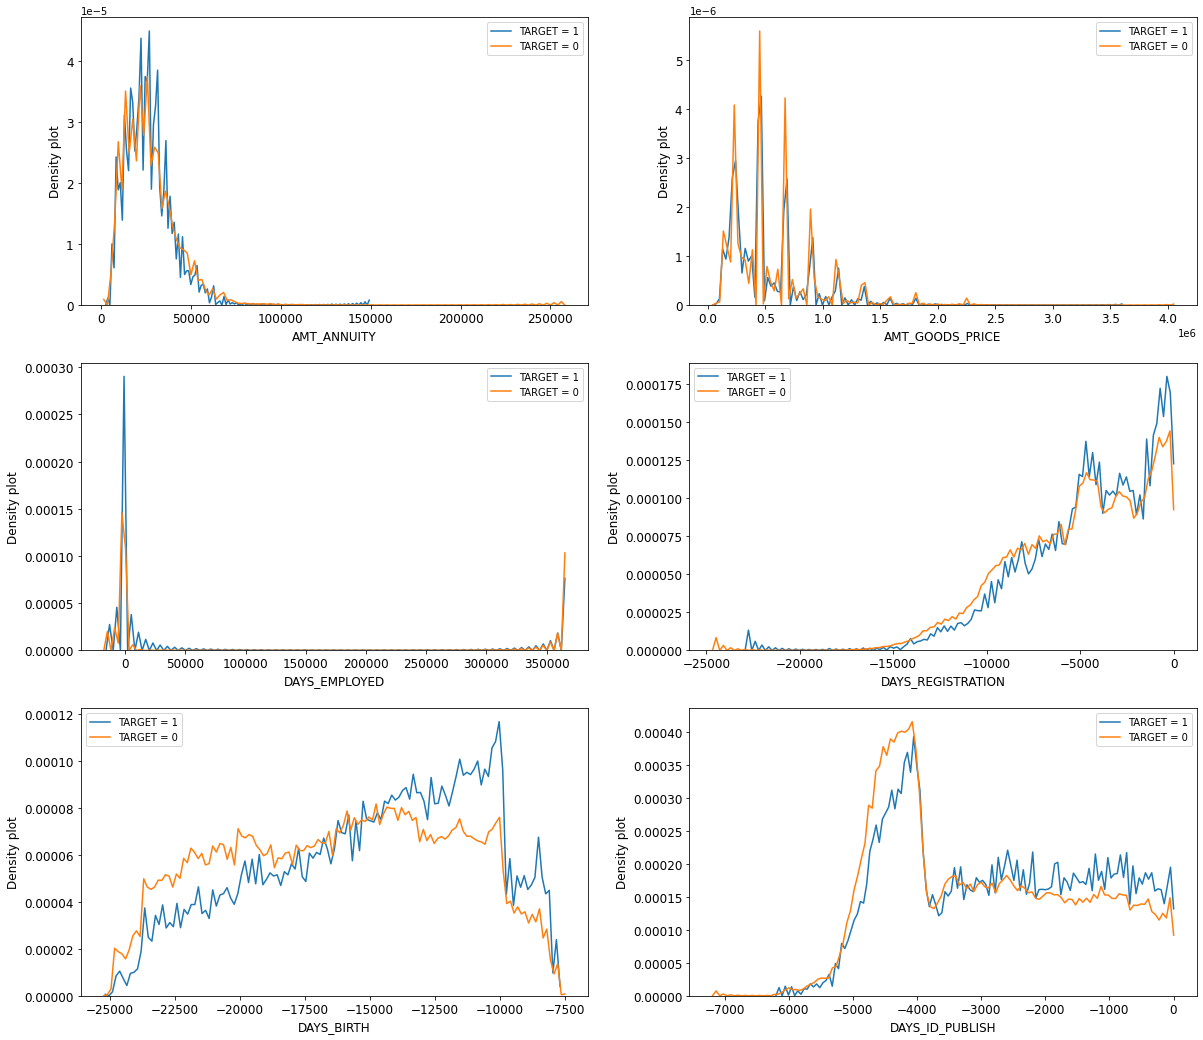

In [19]:
t1 = application_train.loc[application_train['TARGET'] != 0]
t0 = application_train.loc[application_train['TARGET'] == 0]
    
plt.figure()
fig, ax = plt.subplots(3,2,figsize=(20,6*3))
plt.subplot(3,2,1)
sns.kdeplot(t1['AMT_ANNUITY'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['AMT_ANNUITY'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_ANNUITY', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,2)
sns.kdeplot(t1['AMT_GOODS_PRICE'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['AMT_GOODS_PRICE'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_GOODS_PRICE', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,3)
sns.kdeplot(t1['DAYS_EMPLOYED'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_EMPLOYED'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_EMPLOYED', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,4)
sns.kdeplot(t1['DAYS_REGISTRATION'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_REGISTRATION'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_REGISTRATION', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,5)
sns.kdeplot(t1['DAYS_BIRTH'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_BIRTH'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_BIRTH', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(3,2,6)
sns.kdeplot(t1['DAYS_ID_PUBLISH'], bw=0.5,label="TARGET = 1")
sns.kdeplot(t0['DAYS_ID_PUBLISH'], bw=0.5,label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_ID_PUBLISH', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show();